In [1]:
from freqml.download import *
from freqml import *
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = read("ETH")

In [3]:
df.shape

(960040, 6)

In [4]:
#df = df_ETH[:]

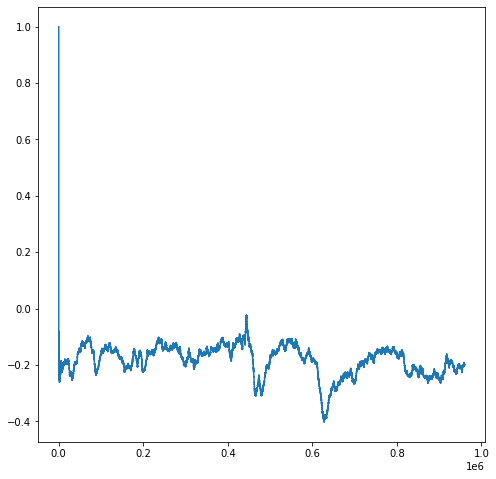

In [5]:
df["b"] = (df.loc[1:, "price"] == df.loc[1:, "price"].shift())
df["b"] = df["b"].apply(lambda x: 1 if x else -1)
df["b_EWMA"] = df[["b"]].ewm(alpha=0.0001).mean()
df["b_EWMA"].plot(figsize=(8, 8))

In [6]:
b_border = 0
T = 0
alpha = 0.02
theta = 100
weighted_sum_T = T
weighted_sum_imbalance = 0
df.loc[:, "theta"] = df["b"].cumsum().abs()
df.loc[:, "TIB_idx"] = 0
while df.loc[b_border:, "theta"].eq(theta).any():
    b_border = df.loc[b_border:, "theta"].eq(theta).idxmax()
    df.loc[b_border:, "TIB_idx"] += 1
    df.loc[b_border:, "theta"] -= theta
    df.loc[b_border:, "theta"] = df["theta"].iloc[b_border:].abs()
    weighted_sum_imbalance = df["b_EWMA"].iloc[b_border]
    T = b_border - T
    weighted_sum_T = alpha*T + (1-alpha)*weighted_sum_T
    theta = np.floor(weighted_sum_T * np.abs(weighted_sum_imbalance))

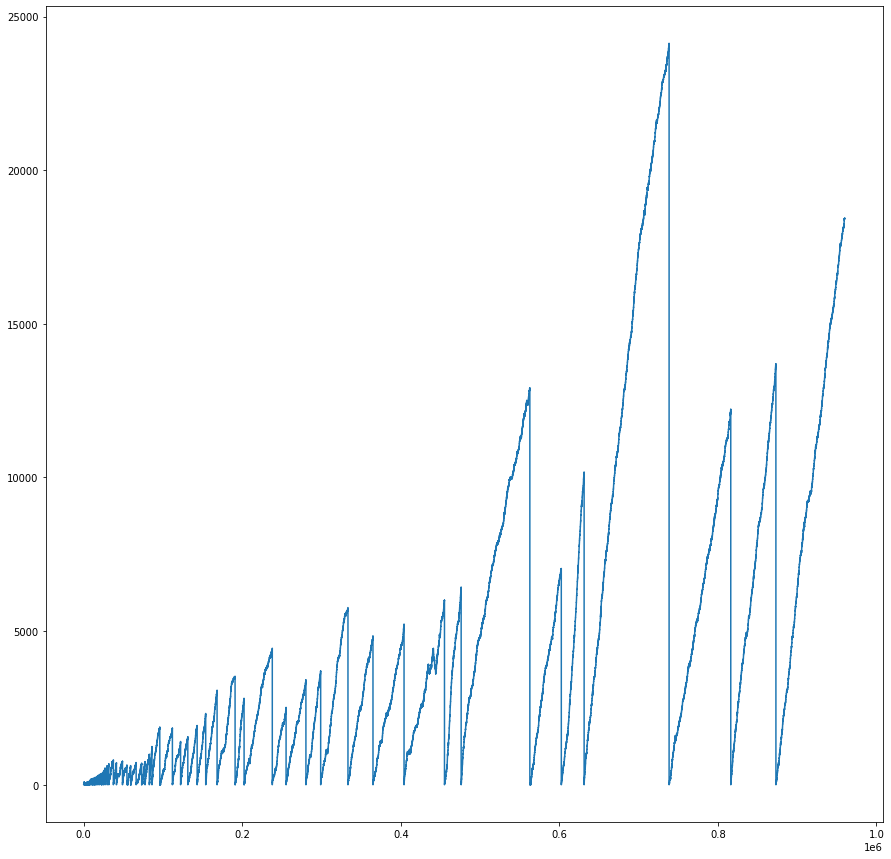

In [7]:
df["theta"].plot(figsize=(15, 15))